<a href="https://colab.research.google.com/github/madeline-evenson/Northwestern-CIERA-Python-Intro/blob/main/Challenge_1_Exoplanet_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Running in Google Colab? Run this cell to download the data
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/exoplanets_subset.txt

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2025-06-05 16:45:32--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/exoplanets_subset.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16581 (16K) [text/plain]
Saving to: ‘exoplanets_subset.txt’

exoplanets_subset.t 100%[===================>]  16.19K  --.-KB/s    in 0.001s  

2025-06-05 16:45:32 (31.4 MB/s) - ‘exoplanets_subset.txt’ saved [16581/16581]



# Challenge 1 | Using Python to Analyze and Plot Exoplanet Data

## Section 1: Background

In the last several years, the Kepler telescope has provided a wealth of data on new exoplanets, not to mention the exoplanets detected previously with other methods and other telescopes. It's a gold mine of data to be explored by astronomers who want to better understand the properties of these planets, such as their sizes, masses, and orbital periods around their host stars.

Here you'll work with a subset of exoplanet data to make a plot similar to the one shown below (Credit: NASA Ames/W. Stenzel). While astronomers have been finding exoplanets since the 1990s, the __[Kepler Mission](https://www.nasa.gov/mission_pages/kepler/overview/index.html)__ has led to an explosion of new expoplanet detections. The Kepler telescope detects planets in a special way called the transit method, whereby it monitors the brightness of stars, and watches for dips in the brightness that occur when a planet transits, or passes in front of, the star. While these brightness dips are incredibly small, Kepler can measure stars' brightness precisely to capture these transit events.

![Kepler Planet Candidates](https://github.com/mcstroh/REACHpy/blob/ideaspy_updates/Module_2/images/Kepler_planets.jpg?raw=1)

Several alternative methods exist for detecting planets, and to date, all method combined, astronomers have detected more than 4700 confirmed exoplanets.

The __[Open Exoplanet Catalogue](http://www.openexoplanetcatalogue.com/)__ is a catalogue of all discovered exoplanets, and is available to the public and can be accessed from your browser or downloaded from Github. For this challenge, we've collected a sample of exoplanet data that you'll use to explore the sizes and orbital periods of a subset of these exoplanets.

To complete this challenge, you will:

 - Create and work with Python lists.
 - Read in and parse data to put it into a useful format.
 - Define your own functions and modules, which helps you to keep your code readable and organized.
 - Create simple plots using the plotting package matplotlib.

You will work with exoplanet data to study the radii and orbital periods around the host stars. We'll need to read in the data from a file, parse the data to extract what we need, write a function to do some unit conversions, and make a couple of plots.

## Section 2: Read and parse data

The file you're using contains comments at the start of the file. We are interested in the *planetary radius* and *orbital period*.

Instead of using Python to read in the file, we will first use a Unix command `cat` to browse the entire file. Run the next cell and use the output to figure out which columns are important.

If you are not using Google Colab, you can instead open this file using your favorite text editor.

In [2]:
# Use the following command to see the first 20 lines of the file we're using. - This not Python
!head -20 exoplanets_subset.txt

# This data is taken from the Open Exoplanet Catalogue
# https://github.com/hannorein/open_exoplanet_catalogue
#
# The data included below is a subset of the full dataset, and includes 
# ONLY those systems which contain non-null entries for the five quantities below
#
# Columns:
#
#  1: Planetary mass [Jupiter masses]  
#  2: Radius [Jupiter radii]
#  3: Period [days] 
#  4: Discovery method
#  5: Discovery year
#
0.0014 0.054 0.1768913 transit 2012
0.25 0.84 19.22418 transit 2010
0.17 0.82 39.03106 transit 2010
0.022 0.147 1.592851 transit 2010
0.6 1.24 3.372650 transit 2016
1.24 1.67 2.705782 transit 2013


Now read in the file using the `numpy.loadtxt()` introduced in Section 2. You may want to use the `usecols` keyword to only read in certain columns.

In [5]:
# Open and read all lines using NumPy.
import numpy as np

#data types for each column:
# 3 floats, 1 string (discovery method), and 1 integer (discovery year)
dtype = [('mass', 'f8'), ('radius', 'f8'), ('period', 'f8'),
         ('method', 'U10'), ('year', 'i4')]

data = np.genfromtxt('exoplanets_subset.txt',
                     dtype=dtype,
                     comments='#')  # Skip commented header lines

# Optional: print the first few rows to verify
print(data[:5])

[(0.0014, 0.054,  0.1768913, 'transit', 2012)
 (0.25  , 0.84 , 19.22418  , 'transit', 2010)
 (0.17  , 0.82 , 39.03106  , 'transit', 2010)
 (0.022 , 0.147,  1.592851 , 'transit', 2010)
 (0.6   , 1.24 ,  3.37265  , 'transit', 2016)]


Create two arrays where one contains the planetary radii, and another that stores the orbital periods.

In [7]:
# Create the two arrays

planetary_radii = []
orbital_periods = []

for row in data:
    planetary_radii.append(row[1])
    orbital_periods.append(row[2])

## Section 3: Creating Figures

Create a histogram of the planetary radii. Twenty bins is a good starting value for your histogram.

Text(0, 0.5, 'count')

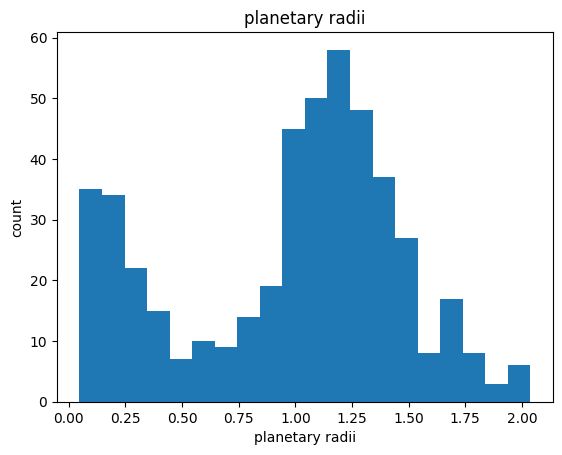

In [15]:
# Create your histogram
import matplotlib.pyplot as plt
plt.hist(planetary_radii, bins=20)
plt.title('planetary radii')
plt.xlabel('planetary radii')
plt.ylabel('count')

Create a figure with the planetary radii (y-axis) versus the orbital period (x-axis). Use dots as your marker symbols, and do not connect the data points with lines (it would be meaningless here).

Text(0.5, 1.0, 'orbital period vs. planetary radii')

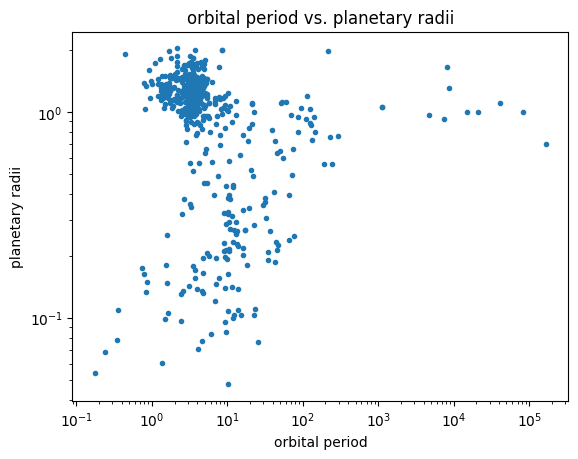

In [16]:
# Create your planetary radii versus orbital period figure
plt.plot(orbital_periods, planetary_radii, ".")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('orbital period')
plt.ylabel('planetary radii')
plt.title('orbital period vs. planetary radii')

Make sure you've used appropriate x- and y-labels to each of the figures you created. The figure in Section 1 used logarithmic scaling on the x- and y-axes. Use `plt.xscale('log')` and `plt.yscale('log')` to obtain a similar scaling.